In [3]:
import os
os.chdir('..')
import settings

In [11]:
from os import path
from matplotlib import pyplot as plt
%matplotlib inline

In [68]:
from keras.preprocessing.image import list_pictures
from keras.preprocessing import image
motion_detection_test_dir = path.join(settings.test_data_dir, 'motion_detection')

def load(image_file):
    img = image.load_img(image_file, target_size=(224, 224))
    return image.img_to_array(img) / 255

images = list_pictures(motion_detection_test_dir)

In [129]:
def compute(previous, current):
    difference = current - previous
    return 1.5*np.abs(np.power(difference, 1))

def compute1(previous, current):
    difference = np.power(current - previous, 2)
    return 3* np.maximum(difference - 10*np.std(difference), np.zeros_like(difference))

def compute2(previous, current):
    difference = np.power(current - previous, 2)
    std = np.std(difference)
    smoothed = ndimage.gaussian_filter(difference, sigma=(5, 5, 0), order=0)
    return 3* np.maximum(smoothed - 3*std, np.zeros_like(difference))

In [104]:
import scipy.ndimage as ndimage
img = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)



In [ ]:
img = ndimage.gaussian_filter

1676.6 0.0 0.617647
2259.91 0.0 0.429412
730.871 0.0 0.852941
3314.13 0.0 0.552941
1548.7 0.0 0.0882353


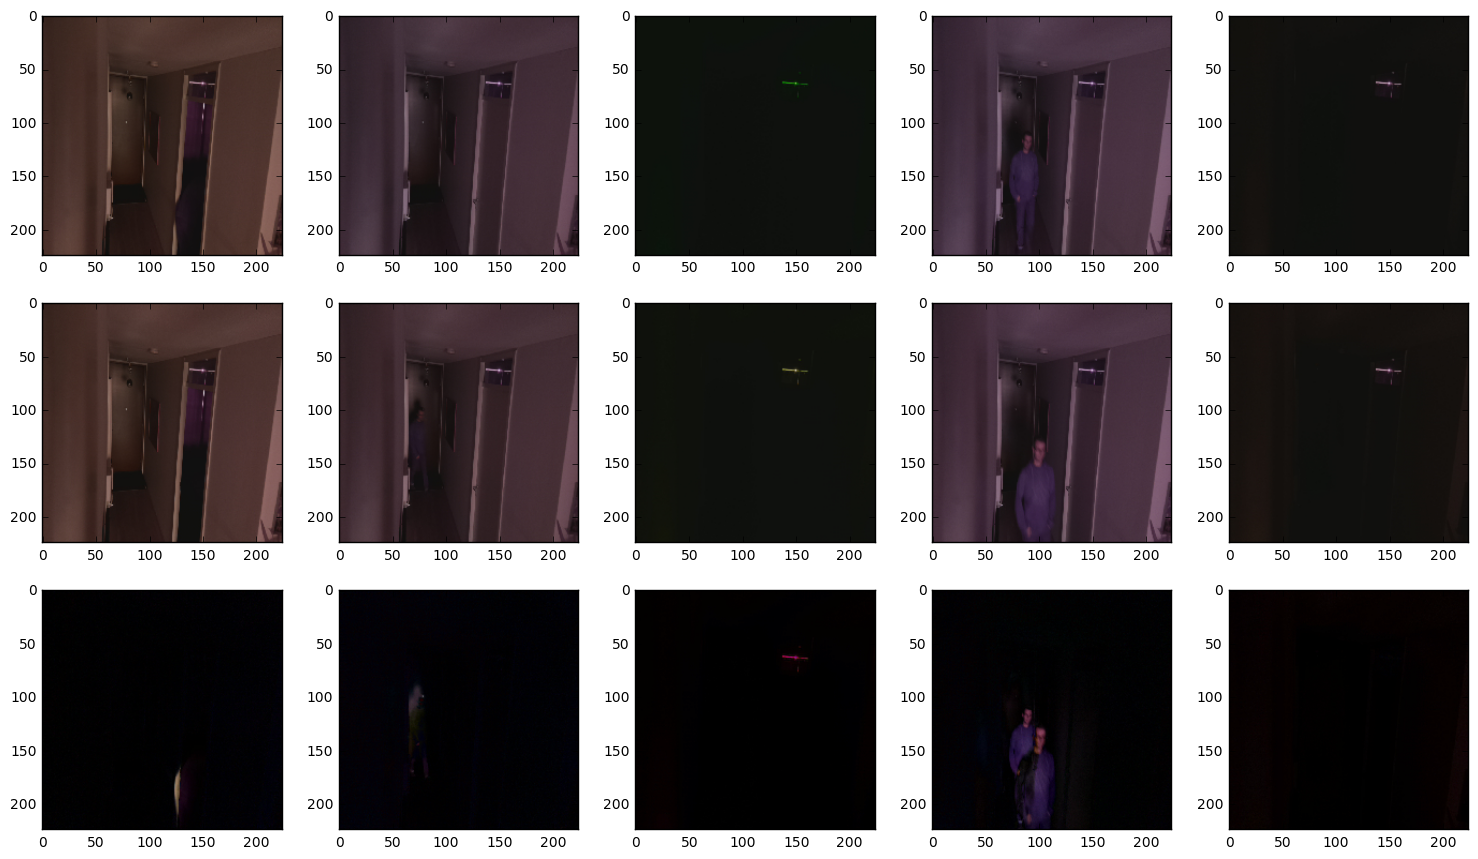

In [130]:
import numpy as np
np.random.seed(3)
n = 5

create_plots(n)

In [72]:
def create_plots(n):
    for i_plt in range(n):
        i_image = np.random.randint(len(images)-1) +1
        previous = load(images[i_image-1])
        current = load(images[i_image])

        visualization = compute(previous, current)        
        print(np.sum(visualization), np.min(visualization), np.max(visualization))

        sub = plt.subplot(3, n, i_plt +1)    
        plt.imshow(previous)
        sub = plt.subplot(3, n, i_plt +1 + n)
        plt.imshow(current)
        sub = plt.subplot(3, n, i_plt +1 + 2*n)
        plt.imshow(visualization)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)